<a href="https://colab.research.google.com/github/Cliffochi/aviva_data_science_course/blob/main/Two_dimensional_arrays_and_gradient_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# [Problem 1] Linear functions
import numpy as np

# creating x values from -50 to 50 with 0.1 intervals
x = np.arange(-50, 50.1, 0.1) # includes 50.0

# corresponding y - values
y = (1/2) * x + 1

# checking values just to verify
print(x)
print(y)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


In [11]:
# [Problem 2] Array concatenation
# method 1: using np.column_stack
xy_stack = np.column_stack((x, y))

# method 2: using np.concatenate with reshape
xy_concat = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)

# verify
print("column_stack:\n", xy_stack)
print("\nnp.concatenate:\n", xy_concat)

column_stack:
 [[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]

np.concatenate:
 [[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


In [13]:
# [Problem 3] Finding the gradient
import numpy as np

# calculating gradient from (dy/dx)
gradient = np.gradient(y, x)

# print results
print("Gradient:\n", gradient)

Gradient:
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]


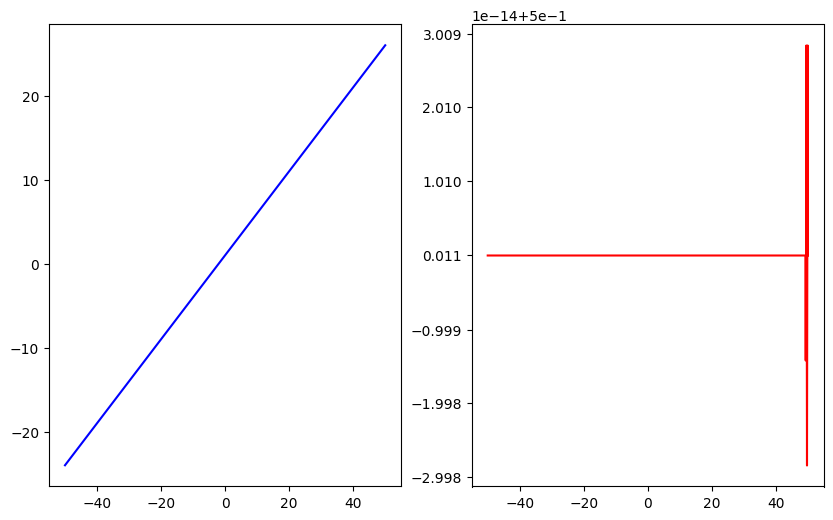

In [17]:
# [Question 4] Draw a graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Linear function plot
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Linear Function', color='blue')

# Gradient plot
plt.subplot(1, 2, 2)
plt.plot(x, gradient, label='Gradient', color='red')

In [19]:
# [Question 5] Python function
import numpy as np
import matplotlib.pyplot as plt

# define the function
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
  """
    Compute function values and gradients for a given function.

    Parameters:
    function : callable
        Function that takes x ndarray and returns y ndarray
    x_range : tuple
        Parameters for np.arange (start, stop, step)

    Returns:
    array_xy : ndarray, shape(n, 2)
        Combined x and y values
    gradient : ndarray, shape(n,)
        Computed gradients
  """
  x = np.arange(*x_range)
  y = function(x)
  # Compute gradient (dy/dx)
  gradient = np.gradient(y, x)

  # Combine x and y
  array_xy = np.column_stack((x, y))

  return array_xy, gradient

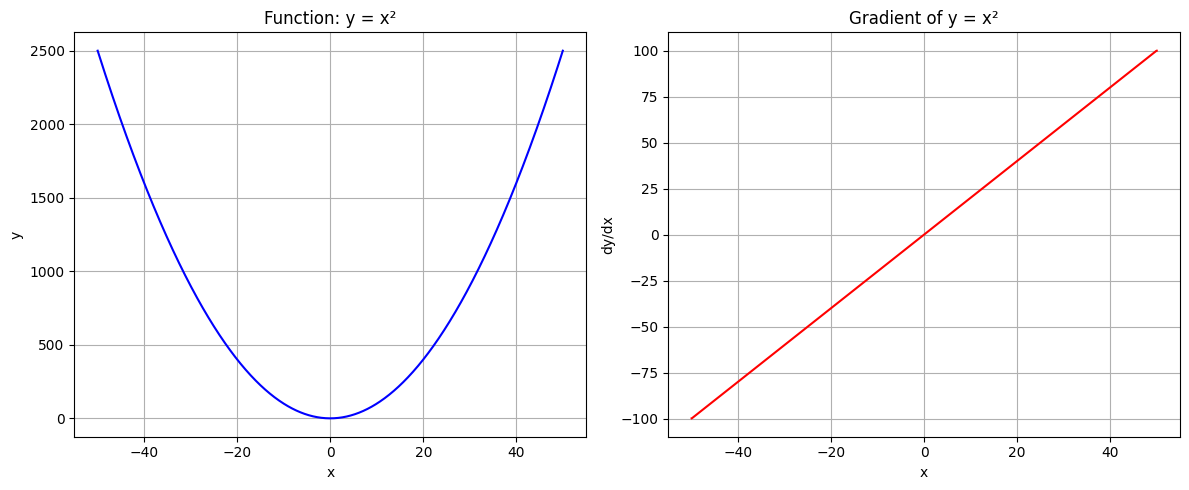

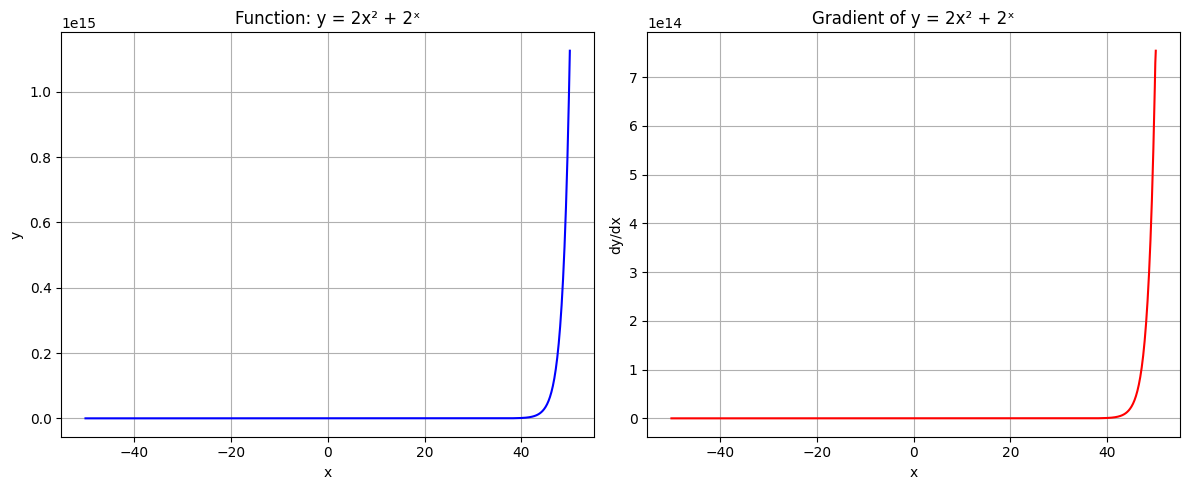

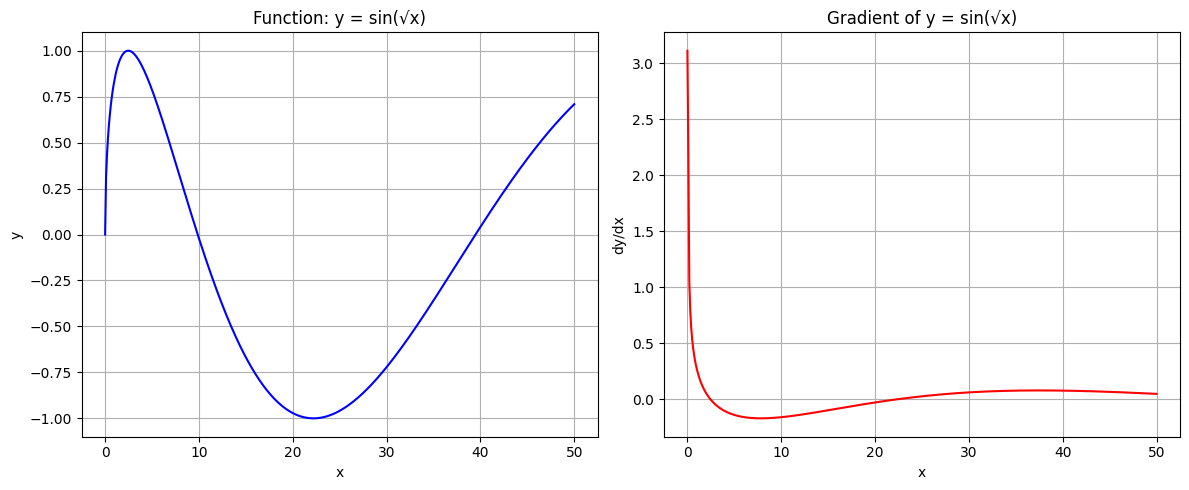

Gradient array for y = x² (first 5 values): [-99.9 -99.8 -99.6 -99.4 -99.2]
Gradient array for y = 2x² + 2ˣ (first 5 values): [-199.8 -199.6 -199.2 -198.8 -198.4]
Gradient array for y = sin(√x) (first 5 values): [3.10983593 2.16227419 1.04880353 0.79336139 0.6444632 ]


In [21]:
# testing the function
# Define the three functions
def function1(x):
    return x ** 2

def function2(x):
    return 2 * x**2 + 2**x

def function3(x):
    return np.sin(x ** (1/2))

# Compute gradients for each function
xy1, grad1 = compute_gradient(function1)
xy2, grad2 = compute_gradient(function2)
xy3, grad3 = compute_gradient(function3, (0, 50.1, 0.1))  # Different x_range for function3

# Visualization
def plot_function_and_gradient(xy, gradient, title):
    x, y = xy[:, 0], xy[:, 1]

    plt.figure(figsize=(12, 5))

    # Function plot
    plt.subplot(1, 2, 1)
    plt.plot(x, y, 'b-')
    plt.title(f'Function: {title}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

    # Gradient plot
    plt.subplot(1, 2, 2)
    plt.plot(x, gradient, 'r-')
    plt.title(f'Gradient of {title}')
    plt.xlabel('x')
    plt.ylabel('dy/dx')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot all functions
plot_function_and_gradient(xy1, grad1, 'y = x²')
plot_function_and_gradient(xy2, grad2, 'y = 2x² + 2ˣ')
plot_function_and_gradient(xy3, grad3, 'y = sin(√x)')

# Return gradients
print("Gradient array for y = x² (first 5 values):", grad1[:5])
print("Gradient array for y = 2x² + 2ˣ (first 5 values):", grad2[:5])
print("Gradient array for y = sin(√x) (first 5 values):", grad3[:5])

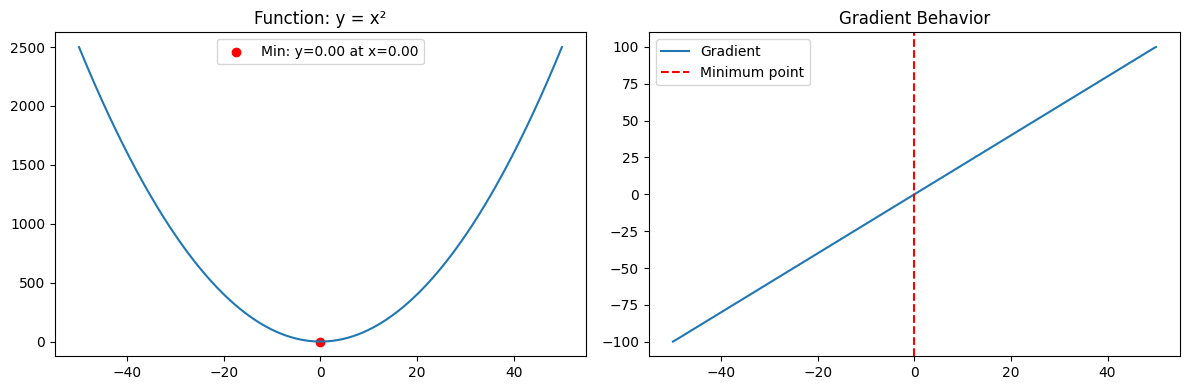

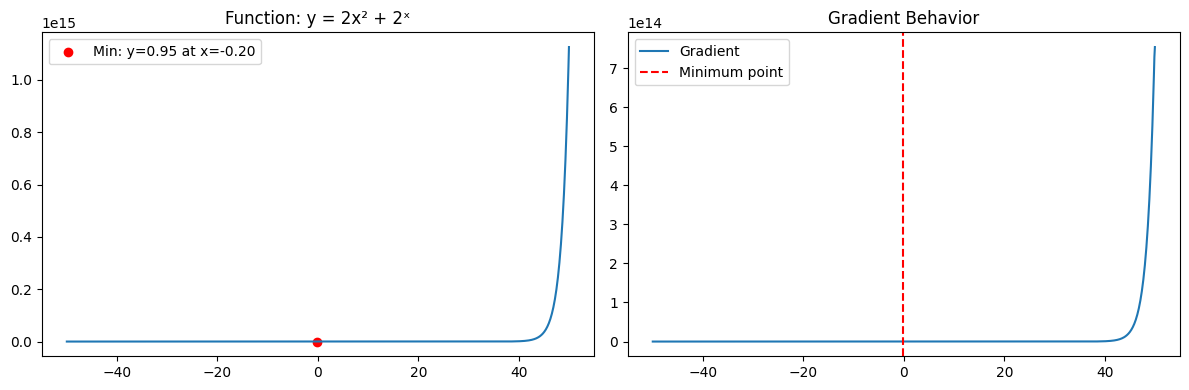

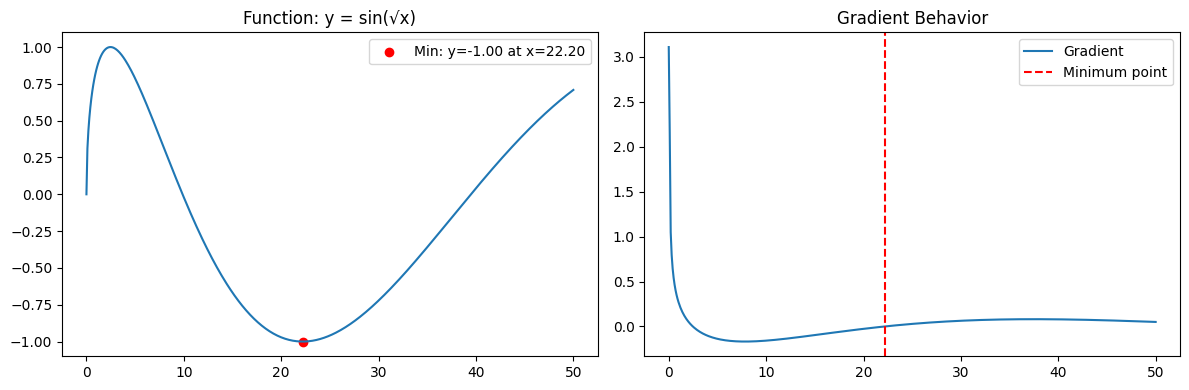

In [23]:
# [Problem 6] Find the minimum value
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the functions
def function1(x):
    return x ** 2

def function2(x):
    return 2 * x**2 + 2**x

def function3(x):
    return np.sin(x ** (1/2))

# 2. Create x values with proper ranges
x1 = np.arange(-50, 50.1, 0.1)  # For function1
x2 = np.arange(-50, 50.1, 0.1)  # For function2
x3 = np.arange(0, 50.1, 0.1)    # For function3 (starts at 0)

# 3. Compute y values
y1 = function1(x1)
y2 = function2(x2)
y3 = function3(x3)

# 4. Compute gradients
grad1 = np.gradient(y1, x1)
grad2 = np.gradient(y2, x2)
grad3 = np.gradient(y3, x3)

# 5. Find minimum values and positions
min_y1, idx1 = y1.min(), y1.argmin()
min_y2, idx2 = y2.min(), y2.argmin()
min_y3, idx3 = y3.min(), y3.argmin()

# 6. Function to plot minimum and gradient behavior
def plot_minimum(x, y, grad, title):
    idx = y.argmin()
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(x, y)
    plt.scatter(x[idx], y[idx], c='red', label=f'Min: y={y[idx]:.2f} at x={x[idx]:.2f}')
    plt.title(f'Function: {title}')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(x, grad, label='Gradient')
    plt.axvline(x[idx], c='red', linestyle='--', label='Minimum point')
    plt.title('Gradient Behavior')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 7. Generate all plots
plot_minimum(x1, y1, grad1, 'y = x²')
plot_minimum(x2, y2, grad2, 'y = 2x² + 2ˣ')
plot_minimum(x3, y3, grad3, 'y = sin(√x)')

In [24]:
# 8. Show numerical results
print("Function 1 (y = x²):")
print(f"Minimum y: {min_y1} at x = {x1[idx1]:.1f}")
print(f"Gradient at minimum: {grad1[idx1]:.2f}\n")

print("Function 2 (y = 2x² + 2ˣ):")
print(f"Minimum y: {min_y2} at x = {x2[idx2]:.1f}")
print(f"Gradient at minimum: {grad2[idx2]:.2f}\n")

print("Function 3 (y = sin(√x)):")
print(f"Minimum y: {min_y3} at x = {x3[idx3]:.1f}")
print(f"Gradient at minimum: {grad3[idx3]:.2f}")

Function 1 (y = x²):
Minimum y: 5.048709793414476e-25 at x = 0.0
Gradient at minimum: 0.00

Function 2 (y = 2x² + 2ˣ):
Minimum y: 0.9505505632959851 at x = -0.2
Gradient at minimum: -0.20

Function 3 (y = sin(√x)):
Minimum y: -0.9999997540298113 at x = 22.2
Gradient at minimum: -0.00
